# Nearest Neighbors Classification

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline 

## Preparations

In [2]:
def to_array(x):
    """ Convert an vector to array if needed """
    if len(x.shape)==1:
        x=x.reshape(1,x.shape[0])
    return x


def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,epsilon=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param epsilon: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
         #melange de 2 gaussiennes
         xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex/2)
         xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex/2)
         data=np.vstack((xpos,xneg))
         y=np.hstack((np.ones(nbex/2),-np.ones(nbex/2)))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),nbex/4),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),nbex/4)))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),nbex/4),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),nbex/4)))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(nbex/2),-np.ones(nbex/2)))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,epsilon,nbex)
    data[:,1]+=np.random.normal(0,epsilon,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y

def plot_data(data,labels=None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    
    cols,marks = ["red", "green", "blue", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1],marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])
    """
    plt.scatter(x[labels<0,0],x[labels<0,1],c='red',marker='x')
    plt.scatter(x[labels>0,0],x[labels>0,1],c='green',marker='+')
    """

def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data!=None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y


def plot_frontiere(data,f,step=20):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x,y=make_grid(data=data,step=step)
    res=np.array([f(grid[i,:]) for i in range(x.size)]) 
    res = res.reshape(x.shape)
    #print res
    plt.contourf(x,y,res,colors=('gray','blue'),levels=[-1,0,1])

## Define Classifier

In [3]:
class Classifier(object):
    """ Classe generique d'un classifieur
        Dispose de 3 méthodes :
            fit pour apprendre
            predict pour predire
            score pour evaluer la precision
    """
    def fit(self,x,y):
        raise NotImplementedError("fit non  implemente")
    def predict(self,x):
        raise NotImplementedError("predict non implemente")
    def score(self,x,y):
        return (self.predict(x)==y).mean()

## K Nearest Neighbors Algorithms

In [4]:
class Knn(Classifier):
    def __init__(self, k):
        self.k = k
        
    def fit(self,dataX,dataY):
        self.dataX = dataX
        self.dataY = dataY
        
    def predict(self,X):
        #calculer la distance entre les points de datax et un point de la grille 
        D = np.array([math.sqrt((X[0]-x[0])**2+(X[1]-x[1])**2) for x in self.dataX])
        #on prend les k indices des points les plus proches
        sortInd = D.argsort()[:self.k]
        #On classifie les points selon le signe de la somme de l'étiquette des plus proches voisins
        if self.dataY[sortInd].sum() > 0:
            return 1
        else:
            return -1


## Two gaussian distributions

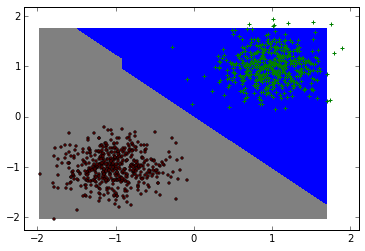

In [8]:
datax,datay = gen_arti( data_type = 0, nbex = 1000) 
testx,testy = gen_arti( data_type = 0, nbex =1000) 

k = 10
knn = Knn(k)
knn.fit(datax,datay)
plot_frontiere(testx,knn.predict,step=20)
plot_data(testx,testy)

## Four gaussian distributions

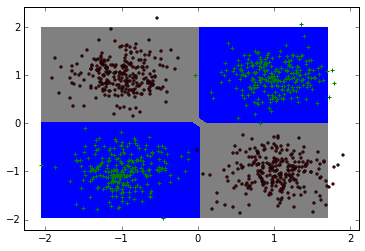

In [10]:
datax,datay = gen_arti( data_type = 1, nbex = 1000) 
testx,testy = gen_arti( data_type = 1, nbex =1000) 

k = 10
knn = Knn(k)
knn.fit(datax,datay)
plot_frontiere(testx,knn.predict,step=20)
plot_data(testx,testy)

## Chessboard gaussian distributions

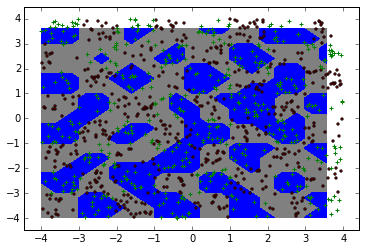

In [11]:
datax,datay = gen_arti( data_type = 2, nbex = 1000) 
testx,testy = gen_arti( data_type = 2, nbex =1000) 

k = 10
knn = Knn(k)
knn.fit(datax,datay)
plot_frontiere(testx,knn.predict,step=20)
plot_data(testx,testy)